In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE, RFECV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegressionCV

In [120]:
#load_path = 'D:\EECE499\Features\\'
load_path = '..\..\..\..\\'

In [121]:
Features = pd.read_excel(load_path + 'Features_FixedWindow.xlsx')

In [122]:
def sort_list(list1, list2): 
    zipped_pairs = zip(list2, list1) 
    z = [x for _, x in sorted(zipped_pairs)] 
    return z

In [123]:
X = Features.iloc[:, :-5].values
y = Features.iloc[:, -5].values

In [124]:
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X)

In [125]:
classifier = SVC(random_state=42, C=0.01, gamma='scale', verbose=42, \
                 class_weight='balanced')

In [126]:
result = cross_validate(classifier, X_scaled, y, cv=10, verbose=42, \
                        scoring=['accuracy', 'neg_mean_absolute_error', 'neg_mean_squared_error'])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


[CV]  ................................................................
[LibSVM][CV]  , accuracy=0.09375, neg_mean_absolute_error=-2.203125, neg_mean_squared_error=-6.703125, total=   1.9s
[CV]  ................................................................
[LibSVM]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s


[CV]  , accuracy=0.09375, neg_mean_absolute_error=-2.203125, neg_mean_squared_error=-6.703125, total=   2.0s
[CV]  ................................................................
[LibSVM]

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.5s remaining:    0.0s


[CV]  , accuracy=0.09375, neg_mean_absolute_error=-2.203125, neg_mean_squared_error=-6.703125, total=   2.0s
[CV]  ................................................................
[LibSVM]

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   12.8s remaining:    0.0s


[CV]  , accuracy=0.06349206349206349, neg_mean_absolute_error=-2.3968253968253967, neg_mean_squared_error=-7.634920634920635, total=   1.8s
[CV]  ................................................................
[LibSVM]

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   17.1s remaining:    0.0s


[CV]  , accuracy=0.06349206349206349, neg_mean_absolute_error=-2.365079365079365, neg_mean_squared_error=-7.253968253968254, total=   1.8s
[CV]  ................................................................
[LibSVM]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   21.4s remaining:    0.0s


[CV]  , accuracy=0.05, neg_mean_absolute_error=-2.8333333333333335, neg_mean_squared_error=-9.666666666666666, total=   1.9s
[CV]  ................................................................
[LibSVM]

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   25.7s remaining:    0.0s


[CV]  , accuracy=0.05, neg_mean_absolute_error=-2.8333333333333335, neg_mean_squared_error=-9.666666666666666, total=   2.0s
[CV]  ................................................................
[LibSVM]

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   30.0s remaining:    0.0s


[CV]  , accuracy=0.0847457627118644, neg_mean_absolute_error=-2.135593220338983, neg_mean_squared_error=-6.169491525423729, total=   1.8s
[CV]  ................................................................
[LibSVM]

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   34.4s remaining:    0.0s


[CV]  , accuracy=0.08620689655172414, neg_mean_absolute_error=-1.9827586206896552, neg_mean_squared_error=-5.155172413793103, total=   1.8s
[CV]  ................................................................
[LibSVM]

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   38.8s remaining:    0.0s


[CV]  , accuracy=0.13793103448275862, neg_mean_absolute_error=-1.7758620689655173, neg_mean_squared_error=-4.327586206896552, total=   1.9s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   43.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   43.0s finished


In [127]:
print(result['train_accuracy'].mean(), result['test_accuracy'].mean())
print(-result['train_neg_mean_absolute_error'].mean(), -result['test_neg_mean_absolute_error'].mean())
print(np.sqrt(-result['train_neg_mean_squared_error'].mean()), np.sqrt(-result['test_neg_mean_squared_error'].mean()))

0.09132208342389163 0.08171178207304741
2.244675956532911 2.2932160338565586
2.601940131946095 2.6454460374072197


C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_neg_mean_absolute_error'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Danny\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_neg_mean_squared_error'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [128]:
classifier.fit(X, y)

[LibSVM]

SVC(C=0.01, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=42)

In [129]:
y_pred = classifier.predict(X)

In [130]:
confusion_mtrx = confusion_matrix(y, y_pred)

In [131]:
confusion_mtrx

array([[  0,   0,   0,   0,   7,   0,   0],
       [  0,   0,   0,   0,  30,   0,   0],
       [  0,   0,   0,   0,  63,   0,   0],
       [  0,   0,   0,   0, 115,   0,   0],
       [  0,   0,   0,   0, 205,   0,   0],
       [  0,   0,   0,   0, 138,   0,   0],
       [  0,   0,   0,   0,  55,   0,   0]], dtype=int64)

In [132]:
accuracy = accuracy_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = mean_squared_error(y, y_pred)

In [133]:
print(accuracy, mae, rmse)

0.33442088091353994 0.9902120717781403 1.8058727569331159


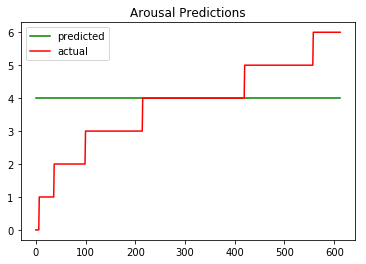

In [134]:
y_new = sort_list(y_pred, y)

plt.title('Arousal Predictions')
plt.plot(y_new, color='green')
plt.plot(sorted(y), color='red')
plt.legend(['predicted', 'actual'])

plt.savefig('arousal.eps', format='eps', dpi=1000)
plt.savefig('arousal.png', format='png', dpi=1000)

plt.show()